# Laboratory excercise 1 and 2
The notebook contains excercise connected to the auditory excerices 1 and 2. For any questions feel free to contact assistans: eda.jovicic@fer.hr and filip.tomas@fer.hr

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

1. Load the dataset *student_score.csv*. When loading the dataset watch out for the index column. 

In [2]:
df = pd.read_csv("students_score.csv")
df

Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0               0     520645  female         NaN   bachelor's degree   
1               1     303683  female     group C        some college   
2               2     457351  female     group B     master's degree   
3               3     812988    male     group A  associate's degree   
4               4     594678    male     group C        some college   
...           ...        ...     ...         ...                 ...   
30636         816     611241  female     group D         high school   
30637         890     299810    male     group E         high school   
30638         911     941589  female         NaN         high school   
30639         934     867225  female     group D  associate's degree   
30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
0          standard       none             married     regularly          yes   
1          standard        NaN             married     sometimes          yes   
2          standard       none              single     sometimes          yes   
3      free/reduced       none             married         never           no   
4          standard       none             married     sometimes          yes   
...             ...        ...                 ...           ...          ...   
30636      standard       none              single     sometimes           no   
30637      standard       none              single     regularly           no   
30638  free/reduced  completed             married     sometimes           no   
30639      standard  completed             married     regularly           no   
30640      standard       none             married         never           no   

       NrSiblings TransportMeans WklyStudyHours  MathScore  ReadingScore  \
0             3.0     school_bus            < 5         71            71   
1             0.0            NaN         5 - 10         69            90   
2             4.0     school_bus            < 5         87            93   
3             1.0            NaN         5 - 10         45            56   
4             0.0     school_bus         5 - 10         76            78   
...           ...            ...            ...        ...           ...   
30636         2.0     school_bus         5 - 10         59            61   
30637         1.0        private         5 - 10         58            53   
30638         1.0        private         5 - 10         61            70   
30639         3.0     school_bus         5 - 10         82            90   
30640         1.0     school_bus         5 - 10         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
30636            65  
30637            51  
30638            67  
30639            93  
30640            58  

[30641 rows x 16 columns]

2. Print the size of the dataset. List the number of examples and the number of features. 

In [3]:
df.shape

(30641, 16)

3. Show the first 5 examples of the dataset. 

In [4]:
df.head(5)

Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0           0     520645  female         NaN   bachelor's degree   
1           1     303683  female     group C        some college   
2           2     457351  female     group B     master's degree   
3           3     812988    male     group A  associate's degree   
4           4     594678    male     group C        some college   

      LunchType TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
0      standard     none             married     regularly          yes   
1      standard      NaN             married     sometimes          yes   
2      standard     none              single     sometimes          yes   
3  free/reduced     none             married         never           no   
4      standard     none             married     sometimes          yes   

   NrSiblings TransportMeans WklyStudyHours  MathScore  ReadingScore  \
0         3.0     school_bus            < 5         71            71   
1         0.0            NaN         5 - 10         69            90   
2         4.0     school_bus            < 5         87            93   
3         1.0            NaN         5 - 10         45            56   
4         0.0     school_bus         5 - 10         76            78   

   WritingScore  
0            74  
1            88  
2            91  
3            42  
4            75

4. Using the third example from the dataset print for every feature the type of data (int, float, string or bool).

In [5]:
row = df.iloc[[2], :]
data_types = row.dtypes
print(data_types)



Unnamed: 0               int64
StudentId                int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object


5. For numerical features print the value of mean, standard deviation and median. 


In [6]:
numerical_columns = df.select_dtypes(include=[int, float])
numerical_columns.drop("StudentId", axis=1, inplace=True)
numerical_columns.drop("Unnamed: 0", axis=1, inplace=True)
numerical_columns.mean()
print(numerical_columns.mean())
numerical_columns.median()
print(numerical_columns.median())
numerical_columns.std()
print(numerical_columns.std())


NrSiblings       2.147305
MathScore       66.558402
ReadingScore    69.377533
WritingScore    68.418622
dtype: float64
NrSiblings       2.0
MathScore       67.0
ReadingScore    70.0
WritingScore    69.0
dtype: float64
NrSiblings       1.466746
MathScore       15.361616
ReadingScore    14.758952
WritingScore    15.443525
dtype: float64


In [7]:
numerical_columns = df.select_dtypes(include=[int, float])


mean_values = df.describe().loc['mean']
std_values = df.describe().loc['std']
median_values = df.describe().loc['50%']
print(mean_values)
print(std_values)
print(median_values)

Unnamed: 0         499.556607
StudentId       549614.852257
NrSiblings           2.147305
MathScore           66.558402
ReadingScore        69.377533
WritingScore        68.418622
Name: mean, dtype: float64
Unnamed: 0         288.747894
StudentId       257913.251180
NrSiblings           1.466746
MathScore           15.361616
ReadingScore        14.758952
WritingScore        15.443525
Name: std, dtype: float64
Unnamed: 0         500.0
StudentId       550904.0
NrSiblings           2.0
MathScore           67.0
ReadingScore        70.0
WritingScore        69.0
Name: 50%, dtype: float64


In [8]:
#ili

print(df["MathScore"].mean())
print(df["NrSiblings"].mean())
print(df["ReadingScore"].mean())
print(df["WritingScore"].mean())
print(df["MathScore"].median())
print(df["NrSiblings"].median())
print(df["ReadingScore"].median())
print(df["WritingScore"].median())
print(df["MathScore"].std())
print(df["NrSiblings"].std())
print(df["ReadingScore"].std())
print(df["WritingScore"].std())



66.5584021409223
2.1473046888437857
69.37753337032082
68.41862210763357
67.0
2.0
70.0
69.0
15.3616156153448
1.4667457527295047
14.758951673577881
15.443524814264753


7. Check the data for missing values. Print the number of missing values for each feature.

In [9]:
df.isna().sum()

Unnamed: 0                0
StudentId                 0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            903
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

8. Let's deal with the missing values. 

a) For the features EthnicGroup, ParentMaritalStatus and WklyStudyHours replace NaN values with the most common value.

b) For the feature ParentEduc replace NaN value with a string *no formal education*.

c) For the feature TestPrep replace NaN value with a string *none*.

d) For the features PracticeSport and IsFirstChild remove all the examples with NaN values. 

e) For the feature NrSiblings replace the NaN value with the median value.

f) Finally, for the feature TransportMeans replace the NaN value with a string *walking*.




In [10]:
columns_to_fillna = ['EthnicGroup', 'ParentMaritalStatus', 'WklyStudyHours']
for column in columns_to_fillna:
    most_common_value = df[column].mode()[0]
    df[column].fillna(most_common_value, inplace=True)
df


Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0               0     520645  female     group C   bachelor's degree   
1               1     303683  female     group C        some college   
2               2     457351  female     group B     master's degree   
3               3     812988    male     group A  associate's degree   
4               4     594678    male     group C        some college   
...           ...        ...     ...         ...                 ...   
30636         816     611241  female     group D         high school   
30637         890     299810    male     group E         high school   
30638         911     941589  female     group C         high school   
30639         934     867225  female     group D  associate's degree   
30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
0          standard       none             married     regularly          yes   
1          standard        NaN             married     sometimes          yes   
2          standard       none              single     sometimes          yes   
3      free/reduced       none             married         never           no   
4          standard       none             married     sometimes          yes   
...             ...        ...                 ...           ...          ...   
30636      standard       none              single     sometimes           no   
30637      standard       none              single     regularly           no   
30638  free/reduced  completed             married     sometimes           no   
30639      standard  completed             married     regularly           no   
30640      standard       none             married         never           no   

       NrSiblings TransportMeans WklyStudyHours  MathScore  ReadingScore  \
0             3.0     school_bus            < 5         71            71   
1             0.0            NaN         5 - 10         69            90   
2             4.0     school_bus            < 5         87            93   
3             1.0            NaN         5 - 10         45            56   
4             0.0     school_bus         5 - 10         76            78   
...           ...            ...            ...        ...           ...   
30636         2.0     school_bus         5 - 10         59            61   
30637         1.0        private         5 - 10         58            53   
30638         1.0        private         5 - 10         61            70   
30639         3.0     school_bus         5 - 10         82            90   
30640         1.0     school_bus         5 - 10         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
30636            65  
30637            51  
30638            67  
30639            93  
30640            58  

[30641 rows x 16 columns]

In [11]:
column_to_fillna = 'ParentEduc'
df[column_to_fillna].fillna("no formal education", inplace=True)
df

Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0               0     520645  female     group C   bachelor's degree   
1               1     303683  female     group C        some college   
2               2     457351  female     group B     master's degree   
3               3     812988    male     group A  associate's degree   
4               4     594678    male     group C        some college   
...           ...        ...     ...         ...                 ...   
30636         816     611241  female     group D         high school   
30637         890     299810    male     group E         high school   
30638         911     941589  female     group C         high school   
30639         934     867225  female     group D  associate's degree   
30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
0          standard       none             married     regularly          yes   
1          standard        NaN             married     sometimes          yes   
2          standard       none              single     sometimes          yes   
3      free/reduced       none             married         never           no   
4          standard       none             married     sometimes          yes   
...             ...        ...                 ...           ...          ...   
30636      standard       none              single     sometimes           no   
30637      standard       none              single     regularly           no   
30638  free/reduced  completed             married     sometimes           no   
30639      standard  completed             married     regularly           no   
30640      standard       none             married         never           no   

       NrSiblings TransportMeans WklyStudyHours  MathScore  ReadingScore  \
0             3.0     school_bus            < 5         71            71   
1             0.0            NaN         5 - 10         69            90   
2             4.0     school_bus            < 5         87            93   
3             1.0            NaN         5 - 10         45            56   
4             0.0     school_bus         5 - 10         76            78   
...           ...            ...            ...        ...           ...   
30636         2.0     school_bus         5 - 10         59            61   
30637         1.0        private         5 - 10         58            53   
30638         1.0        private         5 - 10         61            70   
30639         3.0     school_bus         5 - 10         82            90   
30640         1.0     school_bus         5 - 10         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
30636            65  
30637            51  
30638            67  
30639            93  
30640            58  

[30641 rows x 16 columns]

In [12]:
column_to_fillna = 'TestPrep'
df[column_to_fillna].fillna('none', inplace=True)
df

Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0               0     520645  female     group C   bachelor's degree   
1               1     303683  female     group C        some college   
2               2     457351  female     group B     master's degree   
3               3     812988    male     group A  associate's degree   
4               4     594678    male     group C        some college   
...           ...        ...     ...         ...                 ...   
30636         816     611241  female     group D         high school   
30637         890     299810    male     group E         high school   
30638         911     941589  female     group C         high school   
30639         934     867225  female     group D  associate's degree   
30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
0          standard       none             married     regularly          yes   
1          standard       none             married     sometimes          yes   
2          standard       none              single     sometimes          yes   
3      free/reduced       none             married         never           no   
4          standard       none             married     sometimes          yes   
...             ...        ...                 ...           ...          ...   
30636      standard       none              single     sometimes           no   
30637      standard       none              single     regularly           no   
30638  free/reduced  completed             married     sometimes           no   
30639      standard  completed             married     regularly           no   
30640      standard       none             married         never           no   

       NrSiblings TransportMeans WklyStudyHours  MathScore  ReadingScore  \
0             3.0     school_bus            < 5         71            71   
1             0.0            NaN         5 - 10         69            90   
2             4.0     school_bus            < 5         87            93   
3             1.0            NaN         5 - 10         45            56   
4             0.0     school_bus         5 - 10         76            78   
...           ...            ...            ...        ...           ...   
30636         2.0     school_bus         5 - 10         59            61   
30637         1.0        private         5 - 10         58            53   
30638         1.0        private         5 - 10         61            70   
30639         3.0     school_bus         5 - 10         82            90   
30640         1.0     school_bus         5 - 10         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
30636            65  
30637            51  
30638            67  
30639            93  
30640            58  

[30641 rows x 16 columns]

In [13]:
df.dropna(subset=['PracticeSport', 'IsFirstChild'], inplace=True)
df

Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0               0     520645  female     group C   bachelor's degree   
1               1     303683  female     group C        some college   
2               2     457351  female     group B     master's degree   
3               3     812988    male     group A  associate's degree   
4               4     594678    male     group C        some college   
...           ...        ...     ...         ...                 ...   
30636         816     611241  female     group D         high school   
30637         890     299810    male     group E         high school   
30638         911     941589  female     group C         high school   
30639         934     867225  female     group D  associate's degree   
30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
0          standard       none             married     regularly          yes   
1          standard       none             married     sometimes          yes   
2          standard       none              single     sometimes          yes   
3      free/reduced       none             married         never           no   
4          standard       none             married     sometimes          yes   
...             ...        ...                 ...           ...          ...   
30636      standard       none              single     sometimes           no   
30637      standard       none              single     regularly           no   
30638  free/reduced  completed             married     sometimes           no   
30639      standard  completed             married     regularly           no   
30640      standard       none             married         never           no   

       NrSiblings TransportMeans WklyStudyHours  MathScore  ReadingScore  \
0             3.0     school_bus            < 5         71            71   
1             0.0            NaN         5 - 10         69            90   
2             4.0     school_bus            < 5         87            93   
3             1.0            NaN         5 - 10         45            56   
4             0.0     school_bus         5 - 10         76            78   
...           ...            ...            ...        ...           ...   
30636         2.0     school_bus         5 - 10         59            61   
30637         1.0        private         5 - 10         58            53   
30638         1.0        private         5 - 10         61            70   
30639         3.0     school_bus         5 - 10         82            90   
30640         1.0     school_bus         5 - 10         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
30636            65  
30637            51  
30638            67  
30639            93  
30640            58  

[29117 rows x 16 columns]

In [14]:
column_to_fillna = 'NrSiblings'
median_value = df[column_to_fillna].median()
print(median_value)
df[column_to_fillna].fillna(median_value, inplace=True)
df

2.0


Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0               0     520645  female     group C   bachelor's degree   
1               1     303683  female     group C        some college   
2               2     457351  female     group B     master's degree   
3               3     812988    male     group A  associate's degree   
4               4     594678    male     group C        some college   
...           ...        ...     ...         ...                 ...   
30636         816     611241  female     group D         high school   
30637         890     299810    male     group E         high school   
30638         911     941589  female     group C         high school   
30639         934     867225  female     group D  associate's degree   
30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
0          standard       none             married     regularly          yes   
1          standard       none             married     sometimes          yes   
2          standard       none              single     sometimes          yes   
3      free/reduced       none             married         never           no   
4          standard       none             married     sometimes          yes   
...             ...        ...                 ...           ...          ...   
30636      standard       none              single     sometimes           no   
30637      standard       none              single     regularly           no   
30638  free/reduced  completed             married     sometimes           no   
30639      standard  completed             married     regularly           no   
30640      standard       none             married         never           no   

       NrSiblings TransportMeans WklyStudyHours  MathScore  ReadingScore  \
0             3.0     school_bus            < 5         71            71   
1             0.0            NaN         5 - 10         69            90   
2             4.0     school_bus            < 5         87            93   
3             1.0            NaN         5 - 10         45            56   
4             0.0     school_bus         5 - 10         76            78   
...           ...            ...            ...        ...           ...   
30636         2.0     school_bus         5 - 10         59            61   
30637         1.0        private         5 - 10         58            53   
30638         1.0        private         5 - 10         61            70   
30639         3.0     school_bus         5 - 10         82            90   
30640         1.0     school_bus         5 - 10         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
30636            65  
30637            51  
30638            67  
30639            93  
30640            58  

[29117 rows x 16 columns]

In [15]:
column_to_fillna = 'TransportMeans'
df[column_to_fillna].fillna("walking", inplace=True)

9. Are there inconsistencies in the IsFirstChild column? Replace the inconsistent entries so they match the rest of the values. 

In [16]:
df.loc[(df["IsFirstChild"]!="no") & (df["IsFirstChild"]!="yes")]

Unnamed: 0  StudentId  Gender EthnicGroup           ParentEduc  \
65           72     396525  female     group A   associate's degree   
73           80     433007  female     group B   associate's degree   
85           93     683952    male     group C   associate's degree   
124         133     996479  female     group C         some college   
138         149     438899    male     group E   associate's degree   
145         157     624709    male     group B  no formal education   
216         230     107801    male     group D         some college   
220         234     288783    male     group C    bachelor's degree   
221         235     470338    male     group D   associate's degree   
265         283     371862  female     group D         some college   
323         342     409206  female     group B  no formal education   
327         346     571911    male     group B  no formal education   
354         376     516663  female     group D     some high school   
400         426     205482    male     group C    bachelor's degree   
405         431     636537  female     group C          high school   
409         435     386548    male     group C         some college   
422         448     739613    male     group B          high school   
424         450     417521  female     group C         some college   
520         548     688846  female     group C          high school   
531         560     399191  female     group D         some college   
569         600     372561  female     group C      master's degree   
583         615     219599  female     group C          high school   
620         654     402377  female     group B     some high school   
631         666     847560  female     group C         some college   
639         674     493506  female     group D          high school   
672         708     179084    male     group D          high school   
691         727     626633    male     group E     some high school   
708         744     435429    male     group B         some college   
715         751     292366    male     group E         some college   
746         782     874621  female     group B  no formal education   
751         787     996223  female     group B         some college   
754         790     885327  female     group B          high school   
769         807     868995  female     group E          high school   
771         809     835871    male     group B    bachelor's degree   
847         895     639999  female     group E  no formal education   
858         906     798051    male     group B  no formal education   
881         931     801702    male     group D         some college   
889         939     395668    male     group D     some high school   
909         959     967656    male     group C          high school   
915         965     489875  female     group D         some college   
921         971     571273    male     group C     some high school   
951           3     118714    male     group D    bachelor's degree   
953           5     498368  female     group D  no formal education   

        LunchType   TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
65   free/reduced       none              single     regularly         nein   
73       standard       none             married     regularly         nope   
85   free/reduced  completed             married     regularly           ye   
124      standard  completed             married         never         nein   
138  free/reduced  completed             married     regularly         nope   
145  free/reduced       none             married     sometimes           si   
216      standard       none             married     regularly          Yes   
220      standard  completed             married     sometimes         nein   
221      standard       none             married     regularly         yeah   
265  free/reduced  completed             married         never           ye   
323      st

In [17]:
df['IsFirstChild'] = df['IsFirstChild'].replace('nein','no')
df['IsFirstChild'] = df['IsFirstChild'].replace('nope','no')
df['IsFirstChild'] = df['IsFirstChild'].replace('noo','no')
df['IsFirstChild'] = df['IsFirstChild'].replace('ye', 'yes')
df['IsFirstChild'] = df['IsFirstChild'].replace('si', 'yes')
df['IsFirstChild'] = df['IsFirstChild'].replace('Yes', 'yes')
df['IsFirstChild'] = df['IsFirstChild'].replace('yeah', 'yes')
df['IsFirstChild'] = df['IsFirstChild'].replace('ys', 'yes')
df['IsFirstChild'] = df['IsFirstChild'].replace('yeah boy', 'yes')
df['IsFirstChild'] = df['IsFirstChild'].replace('es', 'yes')

In [18]:
# reset indexes because we removed rows
df.reset_index(inplace=True)

In [19]:
df

index  Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0          0           0     520645  female     group C   bachelor's degree   
1          1           1     303683  female     group C        some college   
2          2           2     457351  female     group B     master's degree   
3          3           3     812988    male     group A  associate's degree   
4          4           4     594678    male     group C        some college   
...      ...         ...        ...     ...         ...                 ...   
29112  30636         816     611241  female     group D         high school   
29113  30637         890     299810    male     group E         high school   
29114  30638         911     941589  female     group C         high school   
29115  30639         934     867225  female     group D  associate's degree   
29116  30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
0          standard       none             married     regularly          yes   
1          standard       none             married     sometimes          yes   
2          standard       none              single     sometimes          yes   
3      free/reduced       none             married         never           no   
4          standard       none             married     sometimes          yes   
...             ...        ...                 ...           ...          ...   
29112      standard       none              single     sometimes           no   
29113      standard       none              single     regularly           no   
29114  free/reduced  completed             married     sometimes           no   
29115      standard  completed             married     regularly           no   
29116      standard       none             married         never           no   

       NrSiblings TransportMeans WklyStudyHours  MathScore  ReadingScore  \
0             3.0     school_bus            < 5         71            71   
1             0.0        walking         5 - 10         69            90   
2             4.0     school_bus            < 5         87            93   
3             1.0        walking         5 - 10         45            56   
4             0.0     school_bus         5 - 10         76            78   
...           ...            ...            ...        ...           ...   
29112         2.0     school_bus         5 - 10         59            61   
29113         1.0        private         5 - 10         58            53   
29114         1.0        private         5 - 10         61            70   
29115         3.0     school_bus         5 - 10         82            90   
29116         1.0     school_bus         5 - 10         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
29112            65  
29113            51  
29114            67  
29115            93  
29116            58  

[29117 rows x 17 columns]

10. The final step to preparing the dataset for classification is transforming the non-numeric variables to numeric variables. 
For features Gender and LunchType use OneHot Encoder, and for EthnicGroup, ParentEduc, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, TransportMeans and WklyStudyHours use Label Encoder. 

In [20]:
# we define the encoder
encoder = OneHotEncoder()
encoder.fit(df[['Gender']])
# we transform the data
df_tmp = encoder.transform(df[['Gender']])
df_tmp = pd.DataFrame(df_tmp.toarray(), columns=encoder.get_feature_names_out(['Gender']))
df = pd.concat((df, df_tmp), axis=1)
df

index  Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0          0           0     520645  female     group C   bachelor's degree   
1          1           1     303683  female     group C        some college   
2          2           2     457351  female     group B     master's degree   
3          3           3     812988    male     group A  associate's degree   
4          4           4     594678    male     group C        some college   
...      ...         ...        ...     ...         ...                 ...   
29112  30636         816     611241  female     group D         high school   
29113  30637         890     299810    male     group E         high school   
29114  30638         911     941589  female     group C         high school   
29115  30639         934     867225  female     group D  associate's degree   
29116  30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
0          standard       none             married     regularly          yes   
1          standard       none             married     sometimes          yes   
2          standard       none              single     sometimes          yes   
3      free/reduced       none             married         never           no   
4          standard       none             married     sometimes          yes   
...             ...        ...                 ...           ...          ...   
29112      standard       none              single     sometimes           no   
29113      standard       none              single     regularly           no   
29114  free/reduced  completed             married     sometimes           no   
29115      standard  completed             married     regularly           no   
29116      standard       none             married         never           no   

       NrSiblings TransportMeans WklyStudyHours  MathScore  ReadingScore  \
0             3.0     school_bus            < 5         71            71   
1             0.0        walking         5 - 10         69            90   
2             4.0     school_bus            < 5         87            93   
3             1.0        walking         5 - 10         45            56   
4             0.0     school_bus         5 - 10         76            78   
...           ...            ...            ...        ...           ...   
29112         2.0     school_bus         5 - 10         59            61   
29113         1.0        private         5 - 10         58            53   
29114         1.0        private         5 - 10         61            70   
29115         3.0     school_bus         5 - 10         82            90   
29116         1.0     school_bus         5 - 10         64            60   

       WritingScore  Gender_female  Gender_male  
0                74            1.0          0.0  
1                88            1.0          0.0  
2                91            1.0          0.0  
3                42            0.0          1.0  
4                75            0.0          1.0  
...             ...            ...          ...  
29112            65            1.0          0.0  
29113            51            0.0          1.0  
29114            67            1.0          0.0  
29115            93            1.0          0.0  
29116            58            0.0          1.0  

[29117 rows x 19 columns]

In [21]:
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df[['LunchType']])
# we transform the data
df_tmp = encoder.transform(df[['LunchType']])
df_tmp = pd.DataFrame(df_tmp.toarray(), columns=encoder.get_feature_names_out(['LunchType']))
df = pd.concat((df, df_tmp), axis=1)
df

index  Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0          0           0     520645  female     group C   bachelor's degree   
1          1           1     303683  female     group C        some college   
2          2           2     457351  female     group B     master's degree   
3          3           3     812988    male     group A  associate's degree   
4          4           4     594678    male     group C        some college   
...      ...         ...        ...     ...         ...                 ...   
29112  30636         816     611241  female     group D         high school   
29113  30637         890     299810    male     group E         high school   
29114  30638         911     941589  female     group C         high school   
29115  30639         934     867225  female     group D  associate's degree   
29116  30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport  ...  \
0          standard       none             married     regularly  ...   
1          standard       none             married     sometimes  ...   
2          standard       none              single     sometimes  ...   
3      free/reduced       none             married         never  ...   
4          standard       none             married     sometimes  ...   
...             ...        ...                 ...           ...  ...   
29112      standard       none              single     sometimes  ...   
29113      standard       none              single     regularly  ...   
29114  free/reduced  completed             married     sometimes  ...   
29115      standard  completed             married     regularly  ...   
29116      standard       none             married         never  ...   

      NrSiblings  TransportMeans WklyStudyHours MathScore  ReadingScore  \
0            3.0      school_bus            < 5        71            71   
1            0.0         walking         5 - 10        69            90   
2            4.0      school_bus            < 5        87            93   
3            1.0         walking         5 - 10        45            56   
4            0.0      school_bus         5 - 10        76            78   
...          ...             ...            ...       ...           ...   
29112        2.0      school_bus         5 - 10        59            61   
29113        1.0         private         5 - 10        58            53   
29114        1.0         private         5 - 10        61            70   
29115        3.0      school_bus         5 - 10        82            90   
29116        1.0      school_bus         5 - 10        64            60   

       WritingScore  Gender_female  Gender_male  LunchType_free/reduced  \
0                74            1.0          0.0                     0.0   
1                88            1.0          0.0                     0.0   
2                91            1.0          0.0                     0.0   
3                42            0.0          1.0                     1.0   
4                75            0.0          1.0                     0.0   
...             ...            ...          ...                     ...   
29112            65            1.0          0.0                     0.0   
29113            51            0.0          1.0                     0.0   
29114            67            1.0          0.0                     1.0   
29115            93            1.0          0.0                     0.0   
29116            58            0.0          1.0                     0.0   

       LunchType_standard  
0                     1.0  
1                     1.0  
2                     1.0  
3                     0.0  
4                     1.0  
...                   ...  
29112                 1.0  
29113                 1.0  
29114                 0.0  
29115                 1.0  
29116                 1.0  

[29117 rows x 21 columns]

In [22]:
columns_to_encode = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']
encoder = LabelEncoder()
for column in columns_to_encode:
    df[column + '_Label'] = encoder.fit_transform(df[column])


In [23]:
df.to_csv("labeled_students_score.csv", index=False)
df

index  Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0          0           0     520645  female     group C   bachelor's degree   
1          1           1     303683  female     group C        some college   
2          2           2     457351  female     group B     master's degree   
3          3           3     812988    male     group A  associate's degree   
4          4           4     594678    male     group C        some college   
...      ...         ...        ...     ...         ...                 ...   
29112  30636         816     611241  female     group D         high school   
29113  30637         890     299810    male     group E         high school   
29114  30638         911     941589  female     group C         high school   
29115  30639         934     867225  female     group D  associate's degree   
29116  30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport  ...  \
0          standard       none             married     regularly  ...   
1          standard       none             married     sometimes  ...   
2          standard       none              single     sometimes  ...   
3      free/reduced       none             married         never  ...   
4          standard       none             married     sometimes  ...   
...             ...        ...                 ...           ...  ...   
29112      standard       none              single     sometimes  ...   
29113      standard       none              single     regularly  ...   
29114  free/reduced  completed             married     sometimes  ...   
29115      standard  completed             married     regularly  ...   
29116      standard       none             married         never  ...   

      LunchType_free/reduced  LunchType_standard EthnicGroup_Label  \
0                        0.0                 1.0                 2   
1                        0.0                 1.0                 2   
2                        0.0                 1.0                 1   
3                        1.0                 0.0                 0   
4                        0.0                 1.0                 2   
...                      ...                 ...               ...   
29112                    0.0                 1.0                 3   
29113                    0.0                 1.0                 4   
29114                    1.0                 0.0                 2   
29115                    0.0                 1.0                 3   
29116                    0.0                 1.0                 1   

      ParentEduc_Label  TestPrep_Label  ParentMaritalStatus_Label  \
0                    1               1                          1   
1                    5               1                          1   
2                    3               1                          2   
3                    0               1                          1   
4                    5               1                          1   
...                ...             ...                        ...   
29112                2               1                          2   
29113                2               1                          2   
29114                2               0                          1   
29115                0               0                          1   
29116                5               1                          1   

       PracticeSport_Label  IsFirstChild_Label  TransportMeans_Label  \
0                        1                   1                     1   
1                        2                   1                     2   
2                        2                   1                     1   
3                        0                   0                     2   
4                        2                   1                     1   
...                    ...                 ...                   ...   
29112  

In [24]:
# separate encoded columns and columns of integer type 
encoded_columns = []
for column in columns_to_encode:
    encoded_columns.append(column + '_Label')
one_hot_encoded_columns = ['StudentId', 'Gender_female', 'Gender_male', 'LunchType_free/reduced', 'LunchType_standard']
other_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']
df_encoded = df[one_hot_encoded_columns + encoded_columns + other_columns].copy()
df_encoded

StudentId  Gender_female  Gender_male  LunchType_free/reduced  \
0         520645            1.0          0.0                     0.0   
1         303683            1.0          0.0                     0.0   
2         457351            1.0          0.0                     0.0   
3         812988            0.0          1.0                     1.0   
4         594678            0.0          1.0                     0.0   
...          ...            ...          ...                     ...   
29112     611241            1.0          0.0                     0.0   
29113     299810            0.0          1.0                     0.0   
29114     941589            1.0          0.0                     1.0   
29115     867225            1.0          0.0                     0.0   
29116     649362            0.0          1.0                     0.0   

       LunchType_standard  EthnicGroup_Label  ParentEduc_Label  \
0                     1.0                  2                 1   
1                     1.0                  2                 5   
2                     1.0                  1                 3   
3                     0.0                  0                 0   
4                     1.0                  2                 5   
...                   ...                ...               ...   
29112                 1.0                  3                 2   
29113                 1.0                  4                 2   
29114                 0.0                  2                 2   
29115                 1.0                  3                 0   
29116                 1.0                  1                 5   

       TestPrep_Label  ParentMaritalStatus_Label  PracticeSport_Label  \
0                   1                          1                    1   
1                   1                          1                    2   
2                   1                          2                    2   
3                   1                          1                    0   
4                   1                          1                    2   
...               ...                        ...                  ...   
29112               1                          2                    2   
29113               1                          2                    1   
29114               0                          1                    2   
29115               0                          1                    1   
29116               1                          1                    0   

       IsFirstChild_Label  TransportMeans_Label  WklyStudyHours_Label  \
0                       1                     1                     1   
1                       1                     2                     0   
2                       1                     1                     1   
3                       0                     2                     0   
4                       1                     1                     0   
...                   ...                   ...                   ...   
29112                   0                     1                     0   
29113                   0                     0                     0   
29114                   0                     0                     0   
29115                   0                     1                     0   
29116                   0                     1                     0   

       NrSiblings  MathScore  ReadingScore  WritingScore  
0             3.0         71            71            74  
1             0.0         69            90            88  
2             4.0         87            93            91  
3             1.0         45            56            42  
4             0.0         76            78            75  
...           ...        ...           ...           ...  
29112         2.0         59            61            65  
29113         1.0         58            53            51  
29114         1.0         61            70            67  
29115

In [25]:
df_encoded.to_csv("cleaned_students_score.csv", index=False)

In [26]:
df2 = pd.read_csv("cleaned_students_score.csv")
df2

StudentId  Gender_female  Gender_male  LunchType_free/reduced  \
0         520645            1.0          0.0                     0.0   
1         303683            1.0          0.0                     0.0   
2         457351            1.0          0.0                     0.0   
3         812988            0.0          1.0                     1.0   
4         594678            0.0          1.0                     0.0   
...          ...            ...          ...                     ...   
29112     611241            1.0          0.0                     0.0   
29113     299810            0.0          1.0                     0.0   
29114     941589            1.0          0.0                     1.0   
29115     867225            1.0          0.0                     0.0   
29116     649362            0.0          1.0                     0.0   

       LunchType_standard  EthnicGroup_Label  ParentEduc_Label  \
0                     1.0                  2                 1   
1                     1.0                  2                 5   
2                     1.0                  1                 3   
3                     0.0                  0                 0   
4                     1.0                  2                 5   
...                   ...                ...               ...   
29112                 1.0                  3                 2   
29113                 1.0                  4                 2   
29114                 0.0                  2                 2   
29115                 1.0                  3                 0   
29116                 1.0                  1                 5   

       TestPrep_Label  ParentMaritalStatus_Label  PracticeSport_Label  \
0                   1                          1                    1   
1                   1                          1                    2   
2                   1                          2                    2   
3                   1                          1                    0   
4                   1                          1                    2   
...               ...                        ...                  ...   
29112               1                          2                    2   
29113               1                          2                    1   
29114               0                          1                    2   
29115               0                          1                    1   
29116               1                          1                    0   

       IsFirstChild_Label  TransportMeans_Label  WklyStudyHours_Label  \
0                       1                     1                     1   
1                       1                     2                     0   
2                       1                     1                     1   
3                       0                     2                     0   
4                       1                     1                     0   
...                   ...                   ...                   ...   
29112                   0                     1                     0   
29113                   0                     0                     0   
29114                   0                     0                     0   
29115                   0                     1                     0   
29116                   0                     1                     0   

       NrSiblings  MathScore  ReadingScore  WritingScore  
0             3.0         71            71            74  
1             0.0         69            90            88  
2             4.0         87            93            91  
3             1.0         45            56            42  
4             0.0         76            78            75  
...           ...        ...           ...           ...  
29112         2.0         59            61            65  
29113         1.0         58            53            51  
29114         1.0         61            70            67  
29115

2. zadaća

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the first exercise and save the final dataset.

In [28]:
X = pd.read_csv("labeled_students_score.csv")
X

index  Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0          0           0     520645  female     group C   bachelor's degree   
1          1           1     303683  female     group C        some college   
2          2           2     457351  female     group B     master's degree   
3          3           3     812988    male     group A  associate's degree   
4          4           4     594678    male     group C        some college   
...      ...         ...        ...     ...         ...                 ...   
29112  30636         816     611241  female     group D         high school   
29113  30637         890     299810    male     group E         high school   
29114  30638         911     941589  female     group C         high school   
29115  30639         934     867225  female     group D  associate's degree   
29116  30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport  ...  \
0          standard       none             married     regularly  ...   
1          standard       none             married     sometimes  ...   
2          standard       none              single     sometimes  ...   
3      free/reduced       none             married         never  ...   
4          standard       none             married     sometimes  ...   
...             ...        ...                 ...           ...  ...   
29112      standard       none              single     sometimes  ...   
29113      standard       none              single     regularly  ...   
29114  free/reduced  completed             married     sometimes  ...   
29115      standard  completed             married     regularly  ...   
29116      standard       none             married         never  ...   

      LunchType_free/reduced  LunchType_standard EthnicGroup_Label  \
0                        0.0                 1.0                 2   
1                        0.0                 1.0                 2   
2                        0.0                 1.0                 1   
3                        1.0                 0.0                 0   
4                        0.0                 1.0                 2   
...                      ...                 ...               ...   
29112                    0.0                 1.0                 3   
29113                    0.0                 1.0                 4   
29114                    1.0                 0.0                 2   
29115                    0.0                 1.0                 3   
29116                    0.0                 1.0                 1   

      ParentEduc_Label  TestPrep_Label  ParentMaritalStatus_Label  \
0                    1               1                          1   
1                    5               1                          1   
2                    3               1                          2   
3                    0               1                          1   
4                    5               1                          1   
...                ...             ...                        ...   
29112                2               1                          2   
29113                2               1                          2   
29114                2               0                          1   
29115                0               0                          1   
29116                5               1                          1   

       PracticeSport_Label  IsFirstChild_Label  TransportMeans_Label  \
0                        1                   1                     1   
1                        2                   1                     2   
2                        2                   1                     1   
3                        0                   0                     2   
4                        2                   1                     1   
...                    ...                 ...                   ...   
29112  

2. a) Draw a histogram of values for the feature MathScore. Set the number of bins to 20. <br>
   b) With a vertical dashed red line denote the median value and with a vertical dashed green line denote the mean value. Set labels for each.<br>
   c) Title the figure "MathScore Histogram". Add proper x and y axis labels. <br>
   d) Add a grid. <br>
   e) Add a legend, place it in the top left corner.

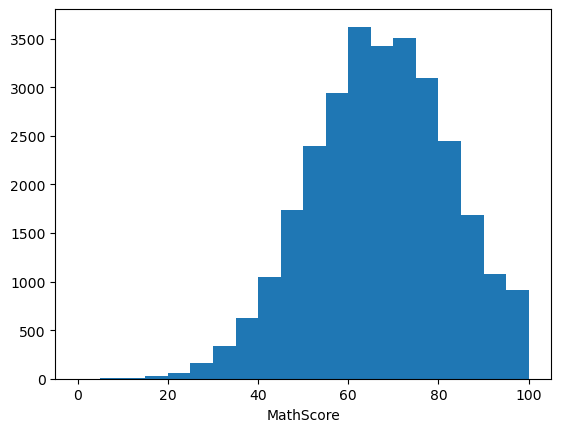

In [29]:
plt.hist(X.MathScore, bins=20)
plt.xlabel('MathScore')
plt.show()

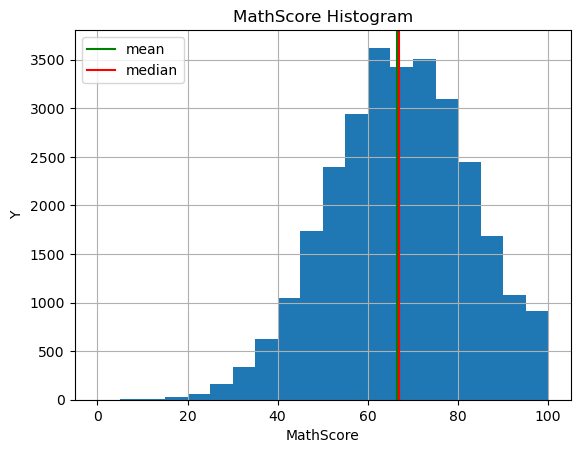

In [30]:
plt.hist(X.MathScore, bins=20)
plt.axvline(X.MathScore.mean(), color = "green", label = "mean")
plt.axvline(X.MathScore.median(), color = "red", label = "median")
plt.title("MathScore Histogram")
plt.grid()
plt.legend(loc='upper left')
plt.xlabel("MathScore")
plt.ylabel("Y")
plt.show()

3. a) Make a pie chart of the feature NrSiblings.
b) Display the labels for each wedge.
c) Display the percentages within edge wedge.
d) Title the figure "NrSiblings pie chart".

In [31]:
siblings = X.groupby('NrSiblings').count().index.values
print(siblings)

[ 0.  1.  2.  3.  4.  5.  6.  7. 10. 12. 26.]


In [32]:
nr_siblings = X['NrSiblings']
count_per_sibling = X.groupby('NrSiblings').count().loc[:,"StudentId"]
print(count_per_sibling)

NrSiblings
0.0     2860
1.0     7818
2.0     7954
3.0     5853
4.0     2794
5.0     1265
6.0      289
7.0      281
10.0       1
12.0       1
26.0       1
Name: StudentId, dtype: int64


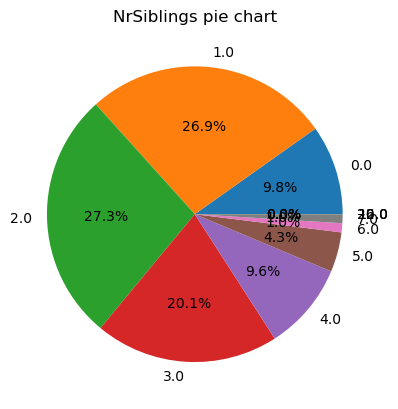

In [33]:
nr_siblings = X['NrSiblings']
count_per_sibling = X.groupby('NrSiblings').count().loc[:,"StudentId"]
sibling_name = X.groupby('NrSiblings').count().index.values
percent = (count_per_sibling/len(X))*100

plt.pie(percent, labels=sibling_name, autopct='%.1f%%')
plt.title('NrSiblings pie chart')

plt.show()

4. a) Create a bar chart of the average ReadingScore for each ParentEduc group.
b) Color each bar in a different color. Set the transparency of the bars to 0.7
c) Calculate the standard deviation of the ReadingScore and add a vertical errorbar to the bar tips.

ParentEduc
associate's degree     71.176203
bachelor's degree      73.106178
high school            67.235435
master's degree        75.883490
no formal education    69.262248
some college           69.160253
some high school       65.477055
Name: ReadingScore, dtype: float64
14.760190310681109


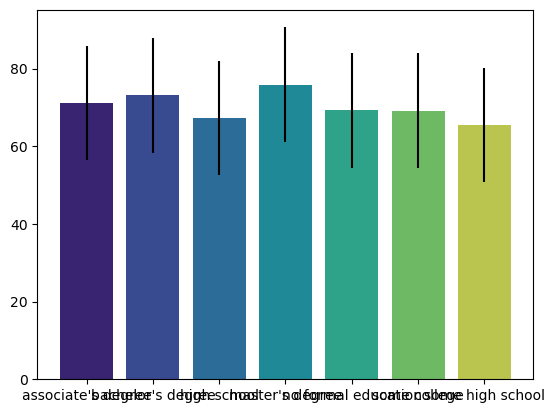

In [34]:
title_name = X.groupby('ParentEduc').count().index.values
average_score = X.groupby("ParentEduc")['ReadingScore'].mean()
print(average_score)

plt.bar(title_name, average_score)

colors = plt.cm.viridis(np.linspace(0, 1, len(average_score)))
standard_dev = X['ReadingScore'].std()
print(standard_dev)
plt.bar(title_name, average_score, yerr=standard_dev, color=colors, alpha=0.7)
plt.show()

5. a) Make a figure divided into 2 rows and 2 columns. Set the figure size to 30 by 30. <br>
   b) In the top left axis:
       1) Draw a line graph of the students' MathScores in descending order.
       2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.
   c) In the top right axis:
       1) Draw a scatter plot of MathScore vs ReadingScore. 
       2) Make the bubbles representing the female students yellow and the ones representing the male students purple. Add and display labels. Set transparency to 0.1.
       3) Set the size of the bubbles to be 50*NrSiblings.
   d) In the bottom left axis:
       1) Draw a boxplot of the WrittingScore feature values.
       2) Remove fliers from the boxplot.
   e) In the borrom right axis:
       1) Draw a bar plot of the number of students using each transportation method.
       2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren in red and the ones who arent in blue. Add and display labels.

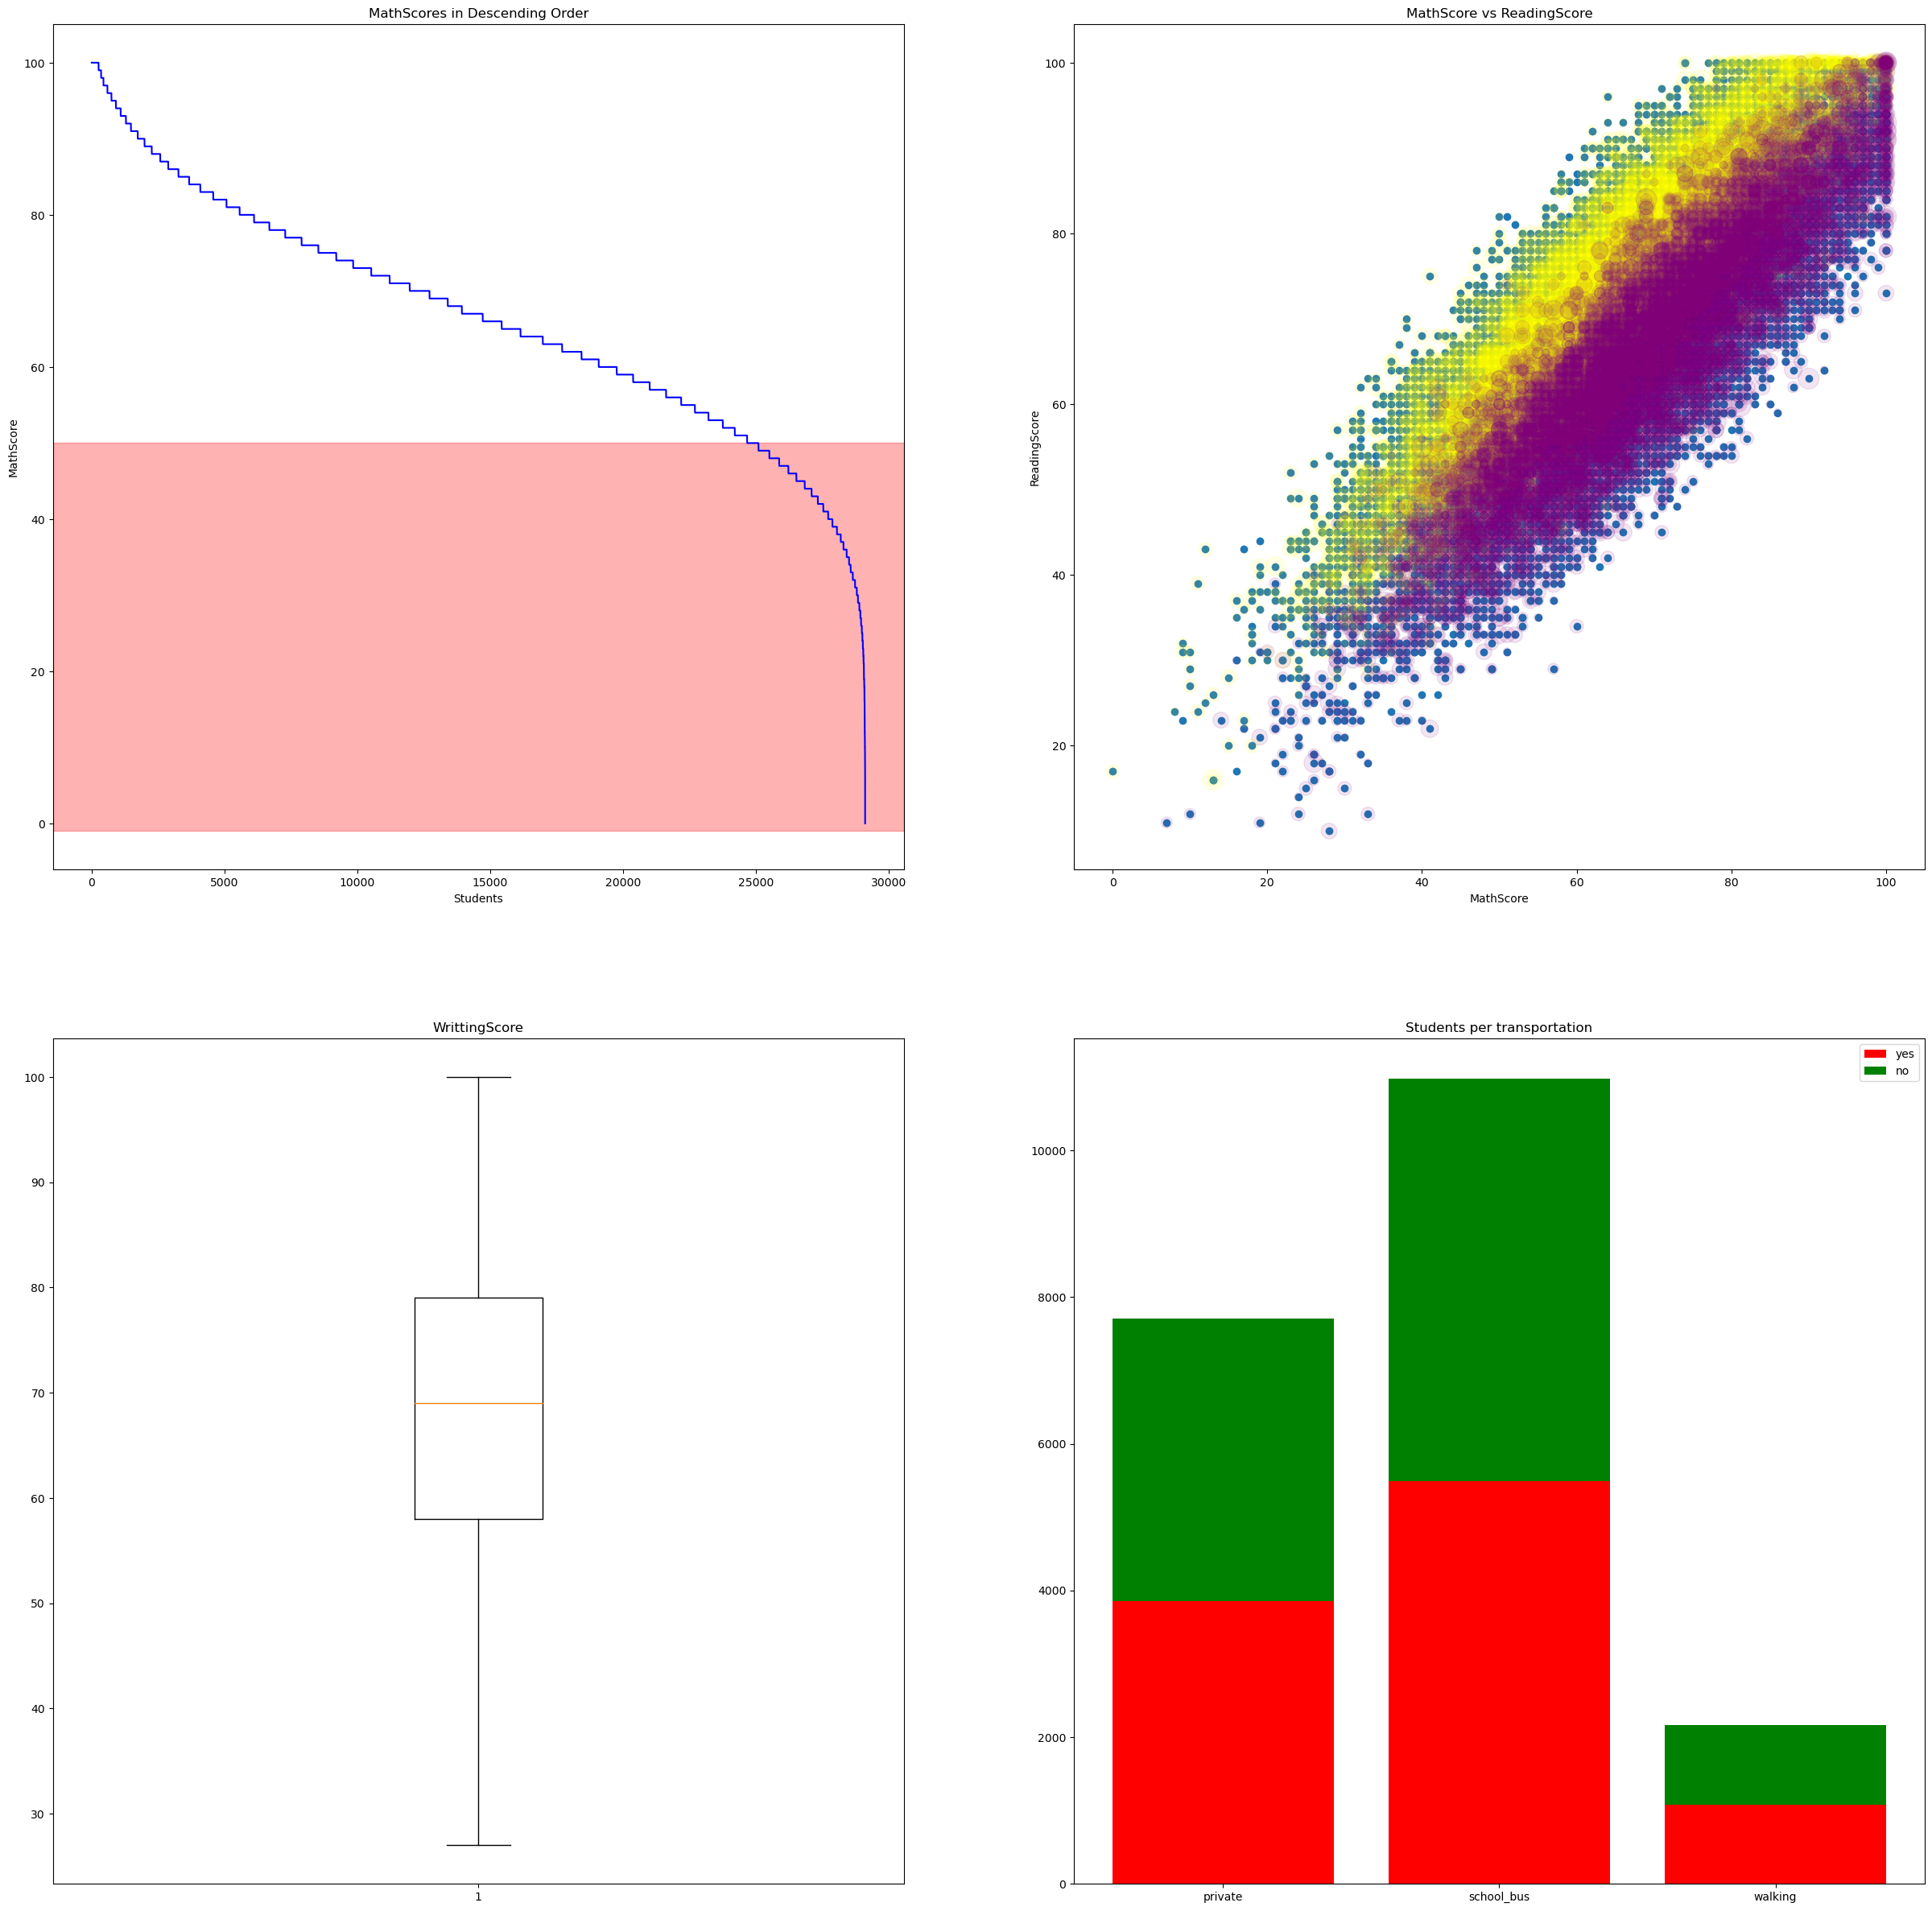

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(30, 30))

#b) In the top left axis: 1) Draw a line graph of the students' MathScores in descending order. 
#2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.



ax[0,0].plot(X['MathScore'].sort_values(ascending=False).values, color='blue')
ax[0,0].axhspan(-1, 50, color='red', alpha=0.3)
ax[0,0].title.set_text('MathScores in Descending Order')
ax[0,0].set_xlabel('Students')
ax[0,0].set_ylabel('MathScore')


# 1) Draw a scatter plot of MathScore vs ReadingScore.
#2) Make the bubbles representing the female students yellow and the ones representing the male students purple. 
#Add and display labels. Set transparency to 0.1
# 3) Set the size of the bubbles to be 50*NrSiblings. 

mask_female = X['Gender'] == 'female'
mask_male = X['Gender'] == 'male'
sizes = X.NrSiblings*50
ax[0,1].scatter(X.MathScore, X.ReadingScore)
ax[0,1].scatter(X.loc[mask_female, 'MathScore'], X.loc[mask_female, 'ReadingScore'], color='yellow', alpha=0.1, label='Female', s=sizes[mask_female])
ax[0,1].scatter(X.loc[mask_male, 'MathScore'], X.loc[mask_male, 'ReadingScore'], color='purple', alpha=0.1, label='Male', s=sizes[mask_male])

ax[0,1].set_xlabel('MathScore')
ax[0,1].set_ylabel('ReadingScore')
ax[0,1].title.set_text("MathScore vs ReadingScore")

#d) In the bottom left axis: 
#1) Draw a boxplot of the WrittingScore feature values. 2) Remove fliers from the boxplot. 

ax[1,0].boxplot(X.WritingScore, showfliers=False)
ax[1,0].title.set_text("WrittingScore")

#e) In the borrom right axis: 1) Draw a bar plot of the number of students using each transportation method. 
#2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren 
#in red and the ones who arent in blue. 
#Add and display labels.

title_name = X.groupby('TransportMeans').count().index.values

mask_yes = X['IsFirstChild'] == 'yes'
mask_no = X['IsFirstChild'] == 'no'

count_per_yes = X.loc[~mask_yes,:].groupby('TransportMeans').count().loc[:,'IsFirstChild'].values
count_per_no = X.loc[mask_no,:].groupby('TransportMeans').count().loc[:,'IsFirstChild'].values

# plot
ax[1,1].bar(title_name, count_per_yes, color='red', label='yes')
ax[1,1].bar(title_name, count_per_no, color='green', label='no', bottom=count_per_no)
ax[1,1].legend(loc='best')
ax[1,1].title.set_text("Students per transportation")

plt.show()

6. a) Using seaborn, display a heatmap of the correlation coefficients between the numeric features. <br>
   b) Set the figure size to 20 by 10. <br>
   b) Make the heatmap display 2 decimal places of the values of the correlation coefficients. <br>
   c) Use the "icefire" colormap.

In [36]:
column_names = X.columns.tolist()
print(column_names)

['index', 'Unnamed: 0', 'StudentId', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore', 'Gender_female', 'Gender_male', 'LunchType_free/reduced', 'LunchType_standard', 'EthnicGroup_Label', 'ParentEduc_Label', 'TestPrep_Label', 'ParentMaritalStatus_Label', 'PracticeSport_Label', 'IsFirstChild_Label', 'TransportMeans_Label', 'WklyStudyHours_Label']


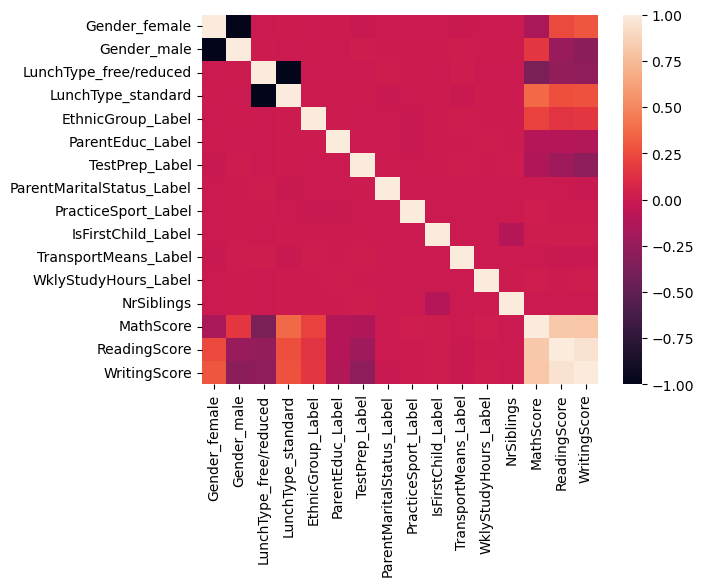

In [37]:
X_cleaned = pd.read_csv("cleaned_students_score.csv")
sns.heatmap(X_cleaned.drop("StudentId", axis=1).corr())
plt.show()

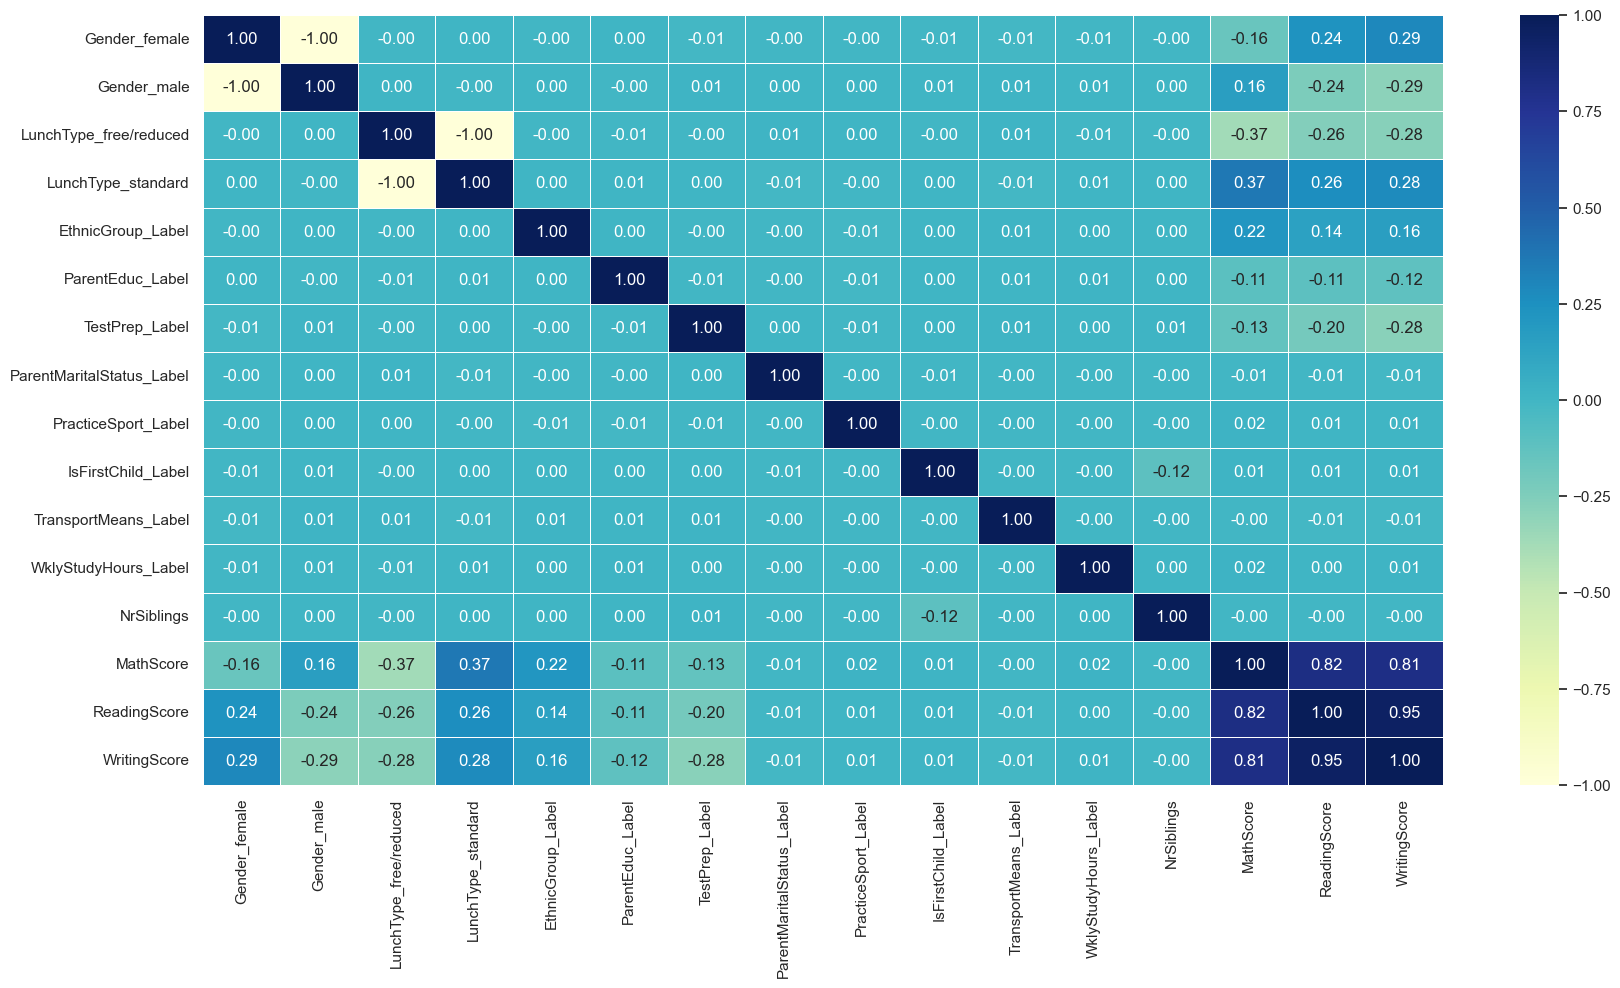

In [38]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_cleaned.drop("StudentId", axis=1).corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
sns.color_palette("icefire", as_cmap=True)
plt.show()

7. a) Make a scatterplot matrix of all the features. <br>
   b) Remove mirroring scatter plots. <br>
   c) Hue the plot by gender.

C:\Users\mirna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


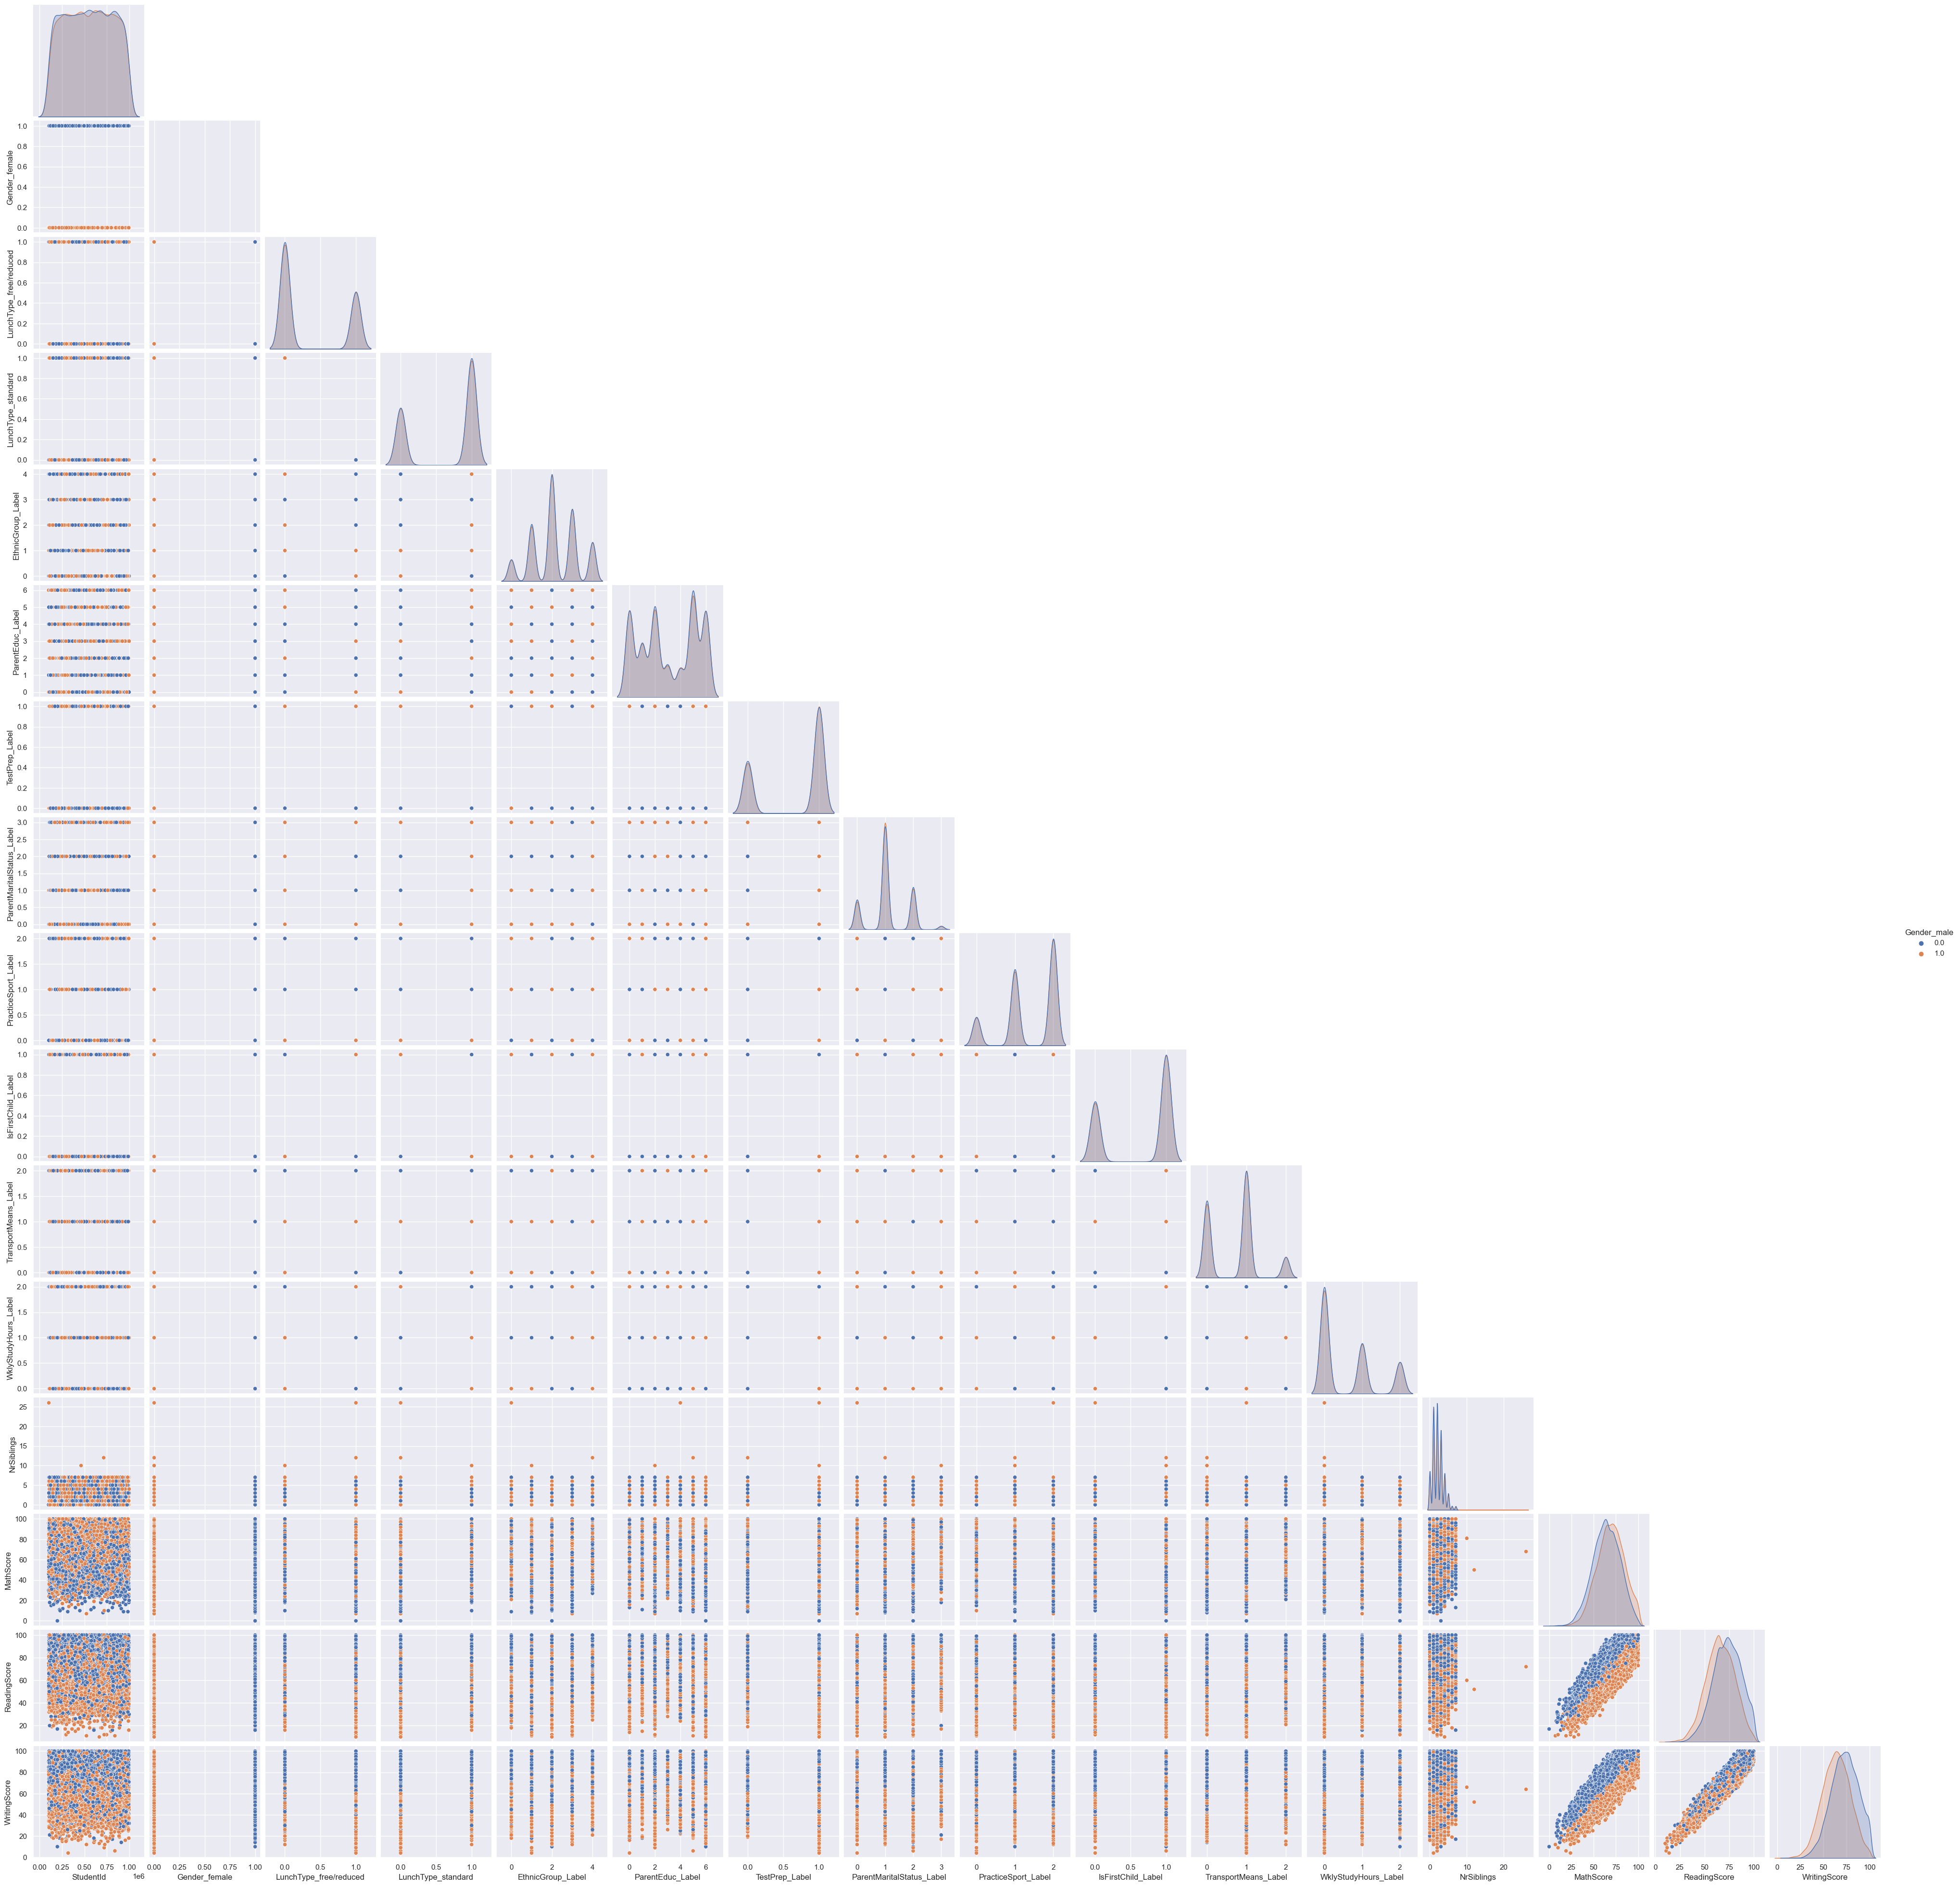

In [42]:
sns.pairplot(X_cleaned, hue="Gender_male", corner=True)

plt.show()

3. zadaća

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [85]:
X = pd.read_csv("cleaned_students_score2.csv")
X.columns

Index(['index', 'Unnamed: 0', 'StudentId', 'Gender', 'EthnicGroup',
       'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus',
       'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans',
       'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore',
       'Gender_female', 'Gender_male', 'LunchType_free/reduced',
       'LunchType_standard', 'EthnicGroup_Label', 'ParentEduc_Label',
       'TestPrep_Label', 'ParentMaritalStatus_Label', 'PracticeSport_Label',
       'IsFirstChild_Label', 'TransportMeans_Label', 'WklyStudyHours_Label'],
      dtype='object')

2. a) Find the mean, median and average scores in mathematics, reading and writing.
b) Find the mean, median and average scores for males and females.
c) What is the coefficient of variation of the scores?

In [86]:
X[["MathScore", "ReadingScore", "WritingScore"]].mean()

MathScore       66.559948
ReadingScore    69.390081
WritingScore    68.429337
dtype: float64

In [87]:
X[["MathScore", "ReadingScore", "WritingScore"]].median()

MathScore       67.0
ReadingScore    70.0
WritingScore    69.0
dtype: float64

In [88]:
X.groupby('Gender')['MathScore'].mean()

Gender
female    64.119419
male      69.038488
Name: MathScore, dtype: float64

In [89]:
X.groupby('Gender')['ReadingScore'].mean()

Gender
female    72.900825
male      65.824657
Name: ReadingScore, dtype: float64

In [90]:
X.groupby('Gender')['WritingScore'].mean()

Gender
female    72.899189
male      63.889866
Name: WritingScore, dtype: float64

In [91]:
X["MathScore"].std() / X.MathScore.mean() * 100

23.053282736702542

In [92]:
X["ReadingScore"].std() / X.ReadingScore.mean() * 100

21.271325834740303

In [93]:
X["WritingScore"].std() / X.WritingScore.mean() * 100

22.574844991058495

In [94]:
X["Gender_female"].std() / X.Gender_female.mean() * 100

99.23192232116615

In [95]:
X["Gender_male"].std() / X.Gender_male.mean() * 100

100.7774838968454

3. a) Use a statistical test to test the hypothesis: H0: the mean mathematical scores of females and males are equal.

In [96]:
from scipy.stats import f_oneway
female_scores = X[X['Gender'] == 'female']['MathScore']
male_scores = X[X['Gender'] == 'male']['MathScore']
stat, p = f_oneway(female_scores, male_scores)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('the mean mathematical scores of females and males are equal')
else:
	print('the mean mathematical scores of females and males are not equal')

stat=767.757, p=0.000
the mean mathematical scores of females and males are not equal


4. a) Use a statistical test to test the hypothesis:
H0 Gender did not affect the writing scores.
H1 Gender affected the writing score.

In [97]:
from scipy import stats

In [98]:
female_scores = X[X['Gender'] == 'female']['WritingScore']
male_scores = X[X['Gender'] == 'male']['WritingScore']
t_statistic, p_value = stats.ttest_ind(female_scores, male_scores)
alpha = 0.05
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: Gender affects the writing score.")
else:
    print("Fail to reject the null hypothesis: Gender did not affect the writing score.")

T-statistic: 52.01694529394566
P-value: 0.0
Reject the null hypothesis: Gender affects the writing score.


In [99]:
female_scores = X[X['Gender'] == 'female']['WritingScore']
male_scores = X[X['Gender'] == 'male']['WritingScore']
stats.levene(female_scores, male_scores)

LeveneResult(statistic=1.6658087333389284, pvalue=0.19683111067146783)

5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

In [100]:
from scipy.stats import kruskal
female_scores = X[X['Gender'] == 'female']['WritingScore']
male_scores = X[X['Gender'] == 'male']['WritingScore']
stat, p = kruskal(female_scores, male_scores)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2412.856, p=0.000
Probably different distributions


In [101]:
female_scores = X[X['Gender'] == 'female']['MathScore']
male_scores = X[X['Gender'] == 'male']['MathScore']
stat, p = kruskal(female_scores, male_scores)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=698.353, p=0.000
Probably different distributions


In [102]:
female_scores = X[X['Gender'] == 'female']['ReadingScore']
male_scores = X[X['Gender'] == 'male']['ReadingScore']
stat, p = kruskal(female_scores, male_scores)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=1616.634, p=0.000
Probably different distributions


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

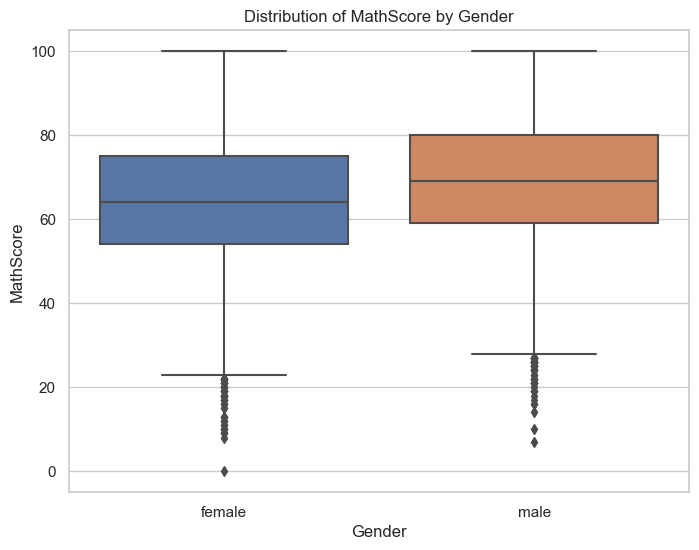

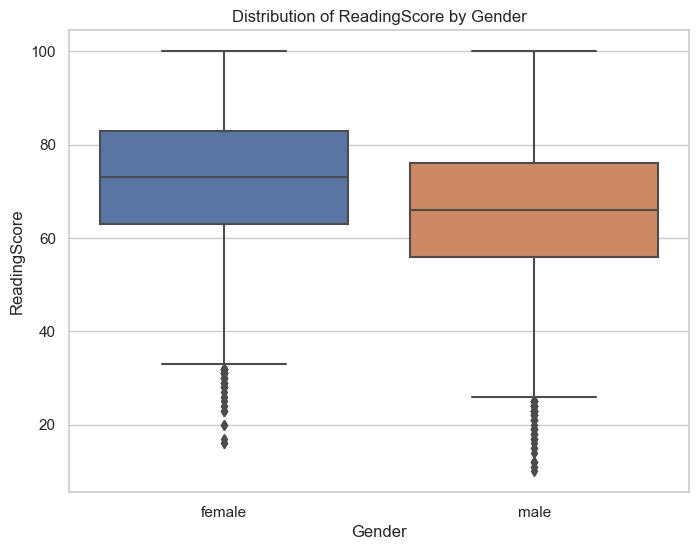

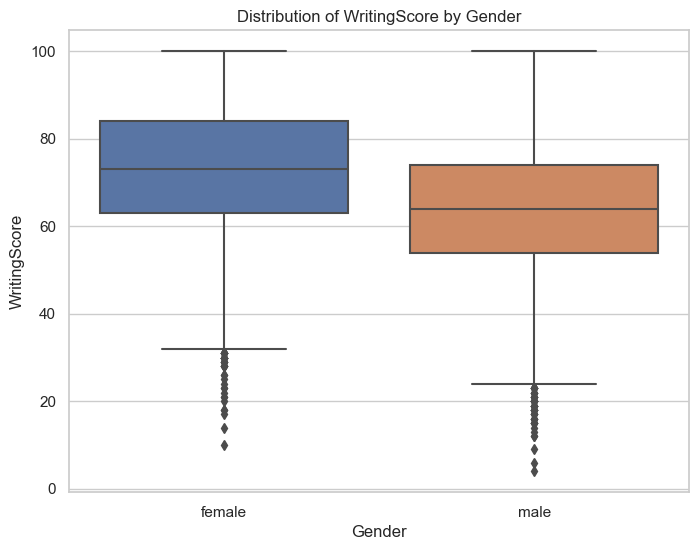

In [104]:
sns.set(style="whitegrid")

for score_column in ['MathScore', 'ReadingScore', 'WritingScore']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender', y=score_column, data=X)
    plt.title(f'Distribution of {score_column} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(score_column)
    plt.show()

# Laboratory exercise 4

In this laboratory exercise you will use the questionnaire and answers given below

In [105]:
import pandas as pd

In [106]:
questionnaire = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                              'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                              'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})

1. Write a function to detrmine the realiability of the questionnaire answers with Cronbach's Alpha.

In [107]:
def cronbach_alpha(data):

    k = data.shape[1]
    item_variances = data.var()
    
    total_score_var = data.sum(axis=1).var()
    
    alpha = (k / (k - 1)) * (1 - (item_variances.sum() / total_score_var))
    
    return alpha

questionnaire = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                              'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                              'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})

alpha = cronbach_alpha(questionnaire)
print(f"Cronbach's Alpha: {alpha:.4f}")

Cronbach's Alpha: 0.7734


2. Explain the differences between in-house data labeling, crowdsourcing and outsourcing. 

These are various data labeling methods, each with its own advantages and drawbacks. In-house data labeling ensures the highest quality of work, particularly crucial in fields such as healthcare; however, it is a time-intensive process. Quality assurance is maintained by annotators, often scientists or domain experts within the organization.

On the other hand, crowdsourcing typically involves numerous freelancers, and specific expertise is usually not required as the annotated datasets often involve trivial data, such as images of animals and plants. Crowdsourcing is often cost-effective due to the simplicity of the tasks.

Outsourcing serves as a middle ground between crowdsourcing and in-house labeling, involving the delegation of tasks to an external entity or organization with trained annotators. While the quality may not reach the level of in-house data labeling, it surpasses that of crowdsourcing. This method is suitable for projects with limited funding but requiring a certain level of expertise. One notable advantage of outsourcing is the ability to pre-evaluate individuals' skills before assigning tasks, contributing to better quality control.

3. Explain the main differences between annotation for image classification, object detection and image segmentation.

Image classification entails assigning a label (one of multiple) to the entire image. In object detection, the focus is on identifying and locating objects within an image through the use of bounding boxes, with each bounding box accompanied by a label. Image segmentation, on the other hand, strives to distinguish objects from both the background and other objects in the image. This process usually results in images of the original size, where pixels are assigned a value of 1 if the object is present and 0 otherwise.

# Laboratory excercise 5

The notebook contains excercise connected to the auditory excerice 6. For any questions feel free to contact assistant: eda.jovicic@fer.hr

In [68]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# set seed for consistency
np.random.seed(2)

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [69]:
#load data
df = pd.read_csv('cleaned_students_score.csv')
df

StudentId  Gender_female  Gender_male  LunchType_free/reduced  \
0         520645            1.0          0.0                     0.0   
1         303683            1.0          0.0                     0.0   
2         457351            1.0          0.0                     0.0   
3         812988            0.0          1.0                     1.0   
4         594678            0.0          1.0                     0.0   
...          ...            ...          ...                     ...   
29112     611241            1.0          0.0                     0.0   
29113     299810            0.0          1.0                     0.0   
29114     941589            1.0          0.0                     1.0   
29115     867225            1.0          0.0                     0.0   
29116     649362            0.0          1.0                     0.0   

       LunchType_standard  EthnicGroup_Label  ParentEduc_Label  \
0                     1.0                  2                 1   
1                     1.0                  2                 5   
2                     1.0                  1                 3   
3                     0.0                  0                 0   
4                     1.0                  2                 5   
...                   ...                ...               ...   
29112                 1.0                  3                 2   
29113                 1.0                  4                 2   
29114                 0.0                  2                 2   
29115                 1.0                  3                 0   
29116                 1.0                  1                 5   

       TestPrep_Label  ParentMaritalStatus_Label  PracticeSport_Label  \
0                   1                          1                    1   
1                   1                          1                    2   
2                   1                          2                    2   
3                   1                          1                    0   
4                   1                          1                    2   
...               ...                        ...                  ...   
29112               1                          2                    2   
29113               1                          2                    1   
29114               0                          1                    2   
29115               0                          1                    1   
29116               1                          1                    0   

       IsFirstChild_Label  TransportMeans_Label  WklyStudyHours_Label  \
0                       1                     1                     1   
1                       1                     2                     0   
2                       1                     1                     1   
3                       0                     2                     0   
4                       1                     1                     0   
...                   ...                   ...                   ...   
29112                   0                     1                     0   
29113                   0                     0                     0   
29114                   0                     0                     0   
29115                   0                     1                     0   
29116                   0                     1                     0   

       NrSiblings  MathScore  ReadingScore  WritingScore  
0             3.0         71            71            74  
1             0.0         69            90            88  
2             4.0         87            93            91  
3             1.0         45            56            42  
4             0.0         76            78            75  
...           ...        ...           ...           ...  
29112         2.0         59            61            65  
29113         1.0         58            53            51  
29114         1.0         61            70            67  
29115

2. Using linear regression, model the MathScore using features: TestPrep, NrSiblings, ParentMaritalStatus and ReadingScore. 

In [70]:
# Declares the model
mod = smf.ols(formula='MathScore ~ TestPrep_Label + NrSiblings + ParentMaritalStatus_Label + ReadingScore', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MathScore   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.474e+04
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:58:41   Log-Likelihood:            -1.0471e+05
No. Observations:               29117   AIC:                         2.094e+05
Df Residuals:                   29112   BIC:                         2.095e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.3552      0.302     21.030      0.000       5.763       6.947
TestPrep_Label                1.1073      0.113      9.817      0.000       0.886       1.328
NrSiblings                    0.0154      0.036      0.426      0.670      -0.056       0.086
ParentMaritalStatus_Label    -0.0410      0.076     -0.536      0.592      -0.191       0.109
ReadingScore                  0.8570      0.004    239.501      0.000       0.850       0.864
==============================================================================
Omnibus:                      233.653   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.726
Skew:                          -0.010   Prob(JB):                     1.53e-34
Kurtosis:                       2.642   Cond. No.                         422.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Questions:

a) Using the summary, write down the formula with coefficients

$MathScore = $

𝑀𝑎𝑡ℎ𝑆𝑐𝑜𝑟𝑒 = 6.3552 + 1.1073 ∗ TestPrep + 0.0154 ∗ NrSiblings + (-0.0410) ∗ ParentMaritalStatus + 0.8570 ∗ ReadingScore

b) Are there any statisticaly important features?
TestPrep and ReadingScore 

c) Let's interpret the data, if students do test preparation, how does that affect the outcome on the math exam? 
If students did test preparation, their math exam score would be higher

d) Are students who practice sport better at math exams or worse? Using linear regression, model the MathScore using only one feature: PracticeSport. Don't include intercept. Using summary, decide which students do the best at math exams - those who never practice sport, sometimes practice sport or those who do it regularly?

In [71]:
# Declare the model
# - 1 je za uklanjanje intercepta. Intercept je inače uključen po defaultu a da se dodaje ručno izgledalo bi ovako + 1

mod = smf.ols(formula='MathScore ~ PracticeSport_Label - 1', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              MathScore   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                          8.857e+04
Date:                Sat, 06 Jan 2024   Prob (F-statistic):                        0.00
Time:                        16:58:46   Log-Likelihood:                     -1.4397e+05
No. Observations:               29117   AIC:                                  2.879e+05
Df Residuals:                   29116   BIC:                                  2.880e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
PracticeSport_Label    38.3548      0.129    297.600      0.000      38.102      38.607
==============================================================================
Omnibus:                     1585.882   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1060.414
Skew:                           0.352   Prob(JB):                    5.42e-231
Kurtosis:                       2.384   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Students who do best at math exams are those who practice sport regularly

# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [73]:
#solution
df = pd.read_csv('cleaned_students_score.csv')
df


StudentId  Gender_female  Gender_male  LunchType_free/reduced  \
0         520645            1.0          0.0                     0.0   
1         303683            1.0          0.0                     0.0   
2         457351            1.0          0.0                     0.0   
3         812988            0.0          1.0                     1.0   
4         594678            0.0          1.0                     0.0   
...          ...            ...          ...                     ...   
29112     611241            1.0          0.0                     0.0   
29113     299810            0.0          1.0                     0.0   
29114     941589            1.0          0.0                     1.0   
29115     867225            1.0          0.0                     0.0   
29116     649362            0.0          1.0                     0.0   

       LunchType_standard  EthnicGroup_Label  ParentEduc_Label  \
0                     1.0                  2                 1   
1                     1.0                  2                 5   
2                     1.0                  1                 3   
3                     0.0                  0                 0   
4                     1.0                  2                 5   
...                   ...                ...               ...   
29112                 1.0                  3                 2   
29113                 1.0                  4                 2   
29114                 0.0                  2                 2   
29115                 1.0                  3                 0   
29116                 1.0                  1                 5   

       TestPrep_Label  ParentMaritalStatus_Label  PracticeSport_Label  \
0                   1                          1                    1   
1                   1                          1                    2   
2                   1                          2                    2   
3                   1                          1                    0   
4                   1                          1                    2   
...               ...                        ...                  ...   
29112               1                          2                    2   
29113               1                          2                    1   
29114               0                          1                    2   
29115               0                          1                    1   
29116               1                          1                    0   

       IsFirstChild_Label  TransportMeans_Label  WklyStudyHours_Label  \
0                       1                     1                     1   
1                       1                     2                     0   
2                       1                     1                     1   
3                       0                     2                     0   
4                       1                     1                     0   
...                   ...                   ...                   ...   
29112                   0                     1                     0   
29113                   0                     0                     0   
29114                   0                     0                     0   
29115                   0                     1                     0   
29116                   0                     1                     0   

       NrSiblings  MathScore  ReadingScore  WritingScore  
0             3.0         71            71            74  
1             0.0         69            90            88  
2             4.0         87            93            91  
3             1.0         45            56            42  
4             0.0         76            78            75  
...           ...        ...           ...           ...  
29112         2.0         59            61            65  
29113         1.0         58            53            51  
29114         1.0         61            70            67  
29115

2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [74]:

score_bins = [0, 49, 62, 74, 87, 100]
grade_labels = [1, 2, 3, 4, 5]

df['MathScore'] = pd.cut(df['MathScore'], bins=score_bins, labels=grade_labels, right=True, include_lowest=True)

df

StudentId  Gender_female  Gender_male  LunchType_free/reduced  \
0         520645            1.0          0.0                     0.0   
1         303683            1.0          0.0                     0.0   
2         457351            1.0          0.0                     0.0   
3         812988            0.0          1.0                     1.0   
4         594678            0.0          1.0                     0.0   
...          ...            ...          ...                     ...   
29112     611241            1.0          0.0                     0.0   
29113     299810            0.0          1.0                     0.0   
29114     941589            1.0          0.0                     1.0   
29115     867225            1.0          0.0                     0.0   
29116     649362            0.0          1.0                     0.0   

       LunchType_standard  EthnicGroup_Label  ParentEduc_Label  \
0                     1.0                  2                 1   
1                     1.0                  2                 5   
2                     1.0                  1                 3   
3                     0.0                  0                 0   
4                     1.0                  2                 5   
...                   ...                ...               ...   
29112                 1.0                  3                 2   
29113                 1.0                  4                 2   
29114                 0.0                  2                 2   
29115                 1.0                  3                 0   
29116                 1.0                  1                 5   

       TestPrep_Label  ParentMaritalStatus_Label  PracticeSport_Label  \
0                   1                          1                    1   
1                   1                          1                    2   
2                   1                          2                    2   
3                   1                          1                    0   
4                   1                          1                    2   
...               ...                        ...                  ...   
29112               1                          2                    2   
29113               1                          2                    1   
29114               0                          1                    2   
29115               0                          1                    1   
29116               1                          1                    0   

       IsFirstChild_Label  TransportMeans_Label  WklyStudyHours_Label  \
0                       1                     1                     1   
1                       1                     2                     0   
2                       1                     1                     1   
3                       0                     2                     0   
4                       1                     1                     0   
...                   ...                   ...                   ...   
29112                   0                     1                     0   
29113                   0                     0                     0   
29114                   0                     0                     0   
29115                   0                     1                     0   
29116                   0                     1                     0   

       NrSiblings MathScore  ReadingScore  WritingScore  
0             3.0         3            71            74  
1             0.0         3            90            88  
2             4.0         4            93            91  
3             1.0         1            56            42  
4             0.0         4            78            75  
...           ...       ...           ...           ...  
29112         2.0         2            61            65  
29113         1.0         2            53            51  
29114         1.0         2            70            67  
29115         3

3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [75]:
#X (all features except MathScore, ReadingScore, WritingScore) and y (MathScore)
columns_to_exclude = ['MathScore', 'ReadingScore', 'WritingScore']
X = df.drop(columns=columns_to_exclude)
y = df.MathScore

X.describe()

StudentId  Gender_female   Gender_male  LunchType_free/reduced  \
count   29117.000000   29117.000000  29117.000000            29117.000000   
mean   549872.403682       0.503864      0.496136                0.350173   
std    257933.398471       0.499994      0.499994                0.477032   
min    100024.000000       0.000000      0.000000                0.000000   
25%    328234.000000       0.000000      0.000000                0.000000   
50%    551222.000000       1.000000      0.000000                0.000000   
75%    772360.000000       1.000000      1.000000                1.000000   
max    999992.000000       1.000000      1.000000                1.000000   

       LunchType_standard  EthnicGroup_Label  ParentEduc_Label  \
count        29117.000000       29117.000000      29117.000000   
mean             0.649827           2.172957          3.080881   
std              0.477032           1.105460          2.190324   
min              0.000000           0.000000          0.000000   
25%              0.000000           1.000000          1.000000   
50%              1.000000           2.000000          3.000000   
75%              1.000000           3.000000          5.000000   
max              1.000000           4.000000          6.000000   

       TestPrep_Label  ParentMaritalStatus_Label  PracticeSport_Label  \
count    29117.000000               29117.000000         29117.000000   
mean         0.675276                   1.109077             1.372635   
std          0.468280                   0.676667             0.709069   
min          0.000000                   0.000000             0.000000   
25%          0.000000                   1.000000             1.000000   
50%          1.000000                   1.000000             2.000000   
75%          1.000000                   2.000000             2.000000   
max          1.000000                   3.000000             2.000000   

       IsFirstChild_Label  TransportMeans_Label  WklyStudyHours_Label  \
count        29117.000000          29117.000000          29117.000000   
mean             0.642030              0.730501              0.607995   
std              0.479411              0.633428              0.760503   
min              0.000000              0.000000              0.000000   
25%              0.000000              0.000000              0.000000   
50%              1.000000              1.000000              0.000000   
75%              1.000000              1.000000              1.000000   
max              1.000000              2.000000              2.000000   

         NrSiblings  
count  29117.000000  
mean       2.147714  
std        1.428635  
min        0.000000  
25%        1.000000  
50%        2.000000  
75%        3.000000  
max       26.000000

In [76]:
y.describe()

count     29117
unique        5
top           3
freq       8503
Name: MathScore, dtype: int64

In [77]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)

Training set - X: (20381, 14) y: (20381,)
Testing set - X: (8736, 14) y: (8736,)


4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

In [78]:
from sklearn.metrics import accuracy_score, f1_score


clf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

0.3494734432234432
0.30930889855248317


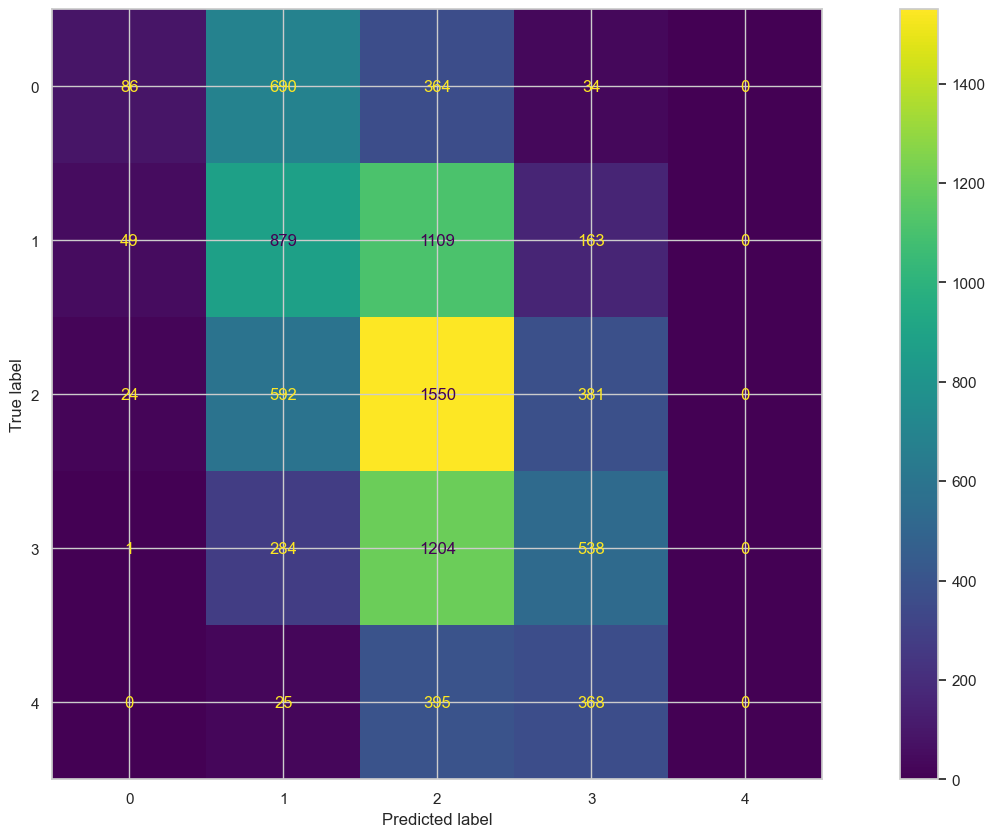

In [79]:
cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.07      0.13      1174
           2       0.36      0.40      0.38      2200
           3       0.34      0.61      0.43      2547
           4       0.36      0.27      0.31      2027
           5       0.00      0.00      0.00       788

    accuracy                           0.35      8736
   macro avg       0.32      0.27      0.25      8736
weighted avg       0.34      0.35      0.31      8736



C:\Users\mirna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
#transform grades into failed (0) or passed (1)

df['MathPassed'] = df['MathScore'].apply(lambda x: 1 if x > 1 else 0)  # 1: Passed, 0: Failed
df['MathPassed']

0        1
1        1
2        1
3        0
4        1
        ..
29112    1
29113    1
29114    1
29115    1
29116    1
Name: MathPassed, Length: 29117, dtype: int64

In [82]:
#Random Forest model
y = df['MathPassed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)

Training set - X: (20381, 14) y: (20381,)
Testing set - X: (8736, 14) y: (8736,)


In [83]:
clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
clf.fit(X_train, y_train)
y_pred = cross_val_predict(clf, X_test, y_test)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

NameError: name 'cross_val_predict' is not defined

6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.
Model je radio značajno bolje u drugom slučaju jer je značajka Mathscore imala samo dvije kategorije, a ne 5 kao u prvom slučaju, stoga je prostor za pogreške bio puno manji.